# COVID-19 Analysis Preparation and Plotting

In [1]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read csv file
# https://data.egov.bg/data/resourceView/e59f95dd-afde-43af-83c8-ea2916badd19
# df = pd.read_csv("data/Обща статистика за разпространението_2020-12-23_v146.csv")
df = pd.read_csv("data/Обща статистика за разпространението_2020-12-29_v152.csv")
dflen = len(df)
print(dflen)

207


In [4]:
# select a part of the columns
df2 = df[
    ['Дата', 'Тестове за денонощие','Нови случаи за денонощие',
     'Хоспитализирани', 'В интензивно отделение', 
     'Излекувани за денонощие', 'Починали за денонощие']
]
# change the column names
df2.rename(columns = {
    'Дата':'Date', 
    'Тестове за денонощие':'Tests',
    'Нови случаи за денонощие':'NewCases',
    'Хоспитализирани':'Hospital', 
    'В интензивно отделение':'Intensive', 
    'Излекувани за денонощие':'Cured', 
    'Починали за денонощие':'Deads',
}, inplace = True)

print(df2.columns)
df2.tail(3)

Index(['Date', 'Tests', 'NewCases', 'Hospital', 'Intensive', 'Cured', 'Deads'], dtype='object')


,Date,Tests,NewCases,Hospital,Intensive,Cured,Deads
204,2020/12/27,1759,469,5545,523,876,50
205,2020/12/28,1905,332,5571,523,1266,41
206,2020/12/29,1012,337,5511,504,1475,87


In [5]:
p1 = df2.copy(deep=True)
p2 = pd.DataFrame(data=None, columns=df2.columns)
p2

,Date,Tests,NewCases,Hospital,Intensive,Cured,Deads


In [6]:
# summing of the columns data by weeks
for i in range(4,dflen,7):
    ppcases = df2.loc[i-4:i+3,'NewCases'].sum()
    p2.loc[i//7,'NewCases'] = ppcases // 7
    
    pptests = df2.loc[i-4:i+3,'Tests'].sum()
    p2.loc[i//7,'Tests'] = pptests // 7
    
    ppdeads = df2.loc[i-4:i+3,'Deads'].sum()
    p2.loc[i//7,'Deads'] = ppdeads // 7
    
    p2.loc[i//7,'Rate'] = (ppcases * 100) // pptests
    
    p2.loc[i//7,'Date'] = df2.loc[i,'Date']

In [7]:
p3 = p2[['Date','Tests','NewCases','Deads','Rate']]
p3.tail(3)

,Date,Tests,NewCases,Deads,Rate
26,2020/12/09,8364.0,3210.0,151.0,38.0
27,2020/12/16,6684.0,2208.0,155.0,33.0
28,2020/12/23,4348.0,1232.0,104.0,28.0


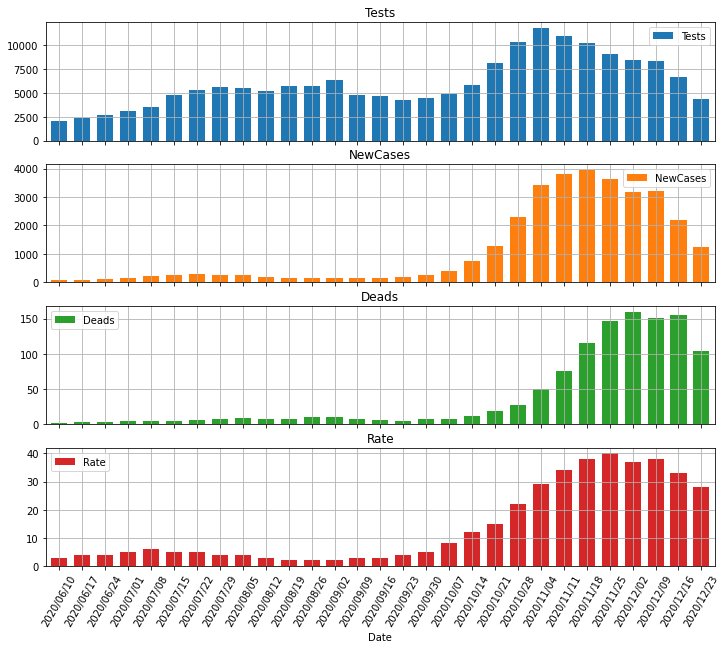

In [12]:
axes = p3.plot.bar(x='Date',rot=60, figsize=(12, 10), width=0.7, grid=True, subplots=True)
plt.xticks(rotation=60)
axes[2].legend(loc=2)

#plt.savefig('covid-19_2020.png', dpi=200)

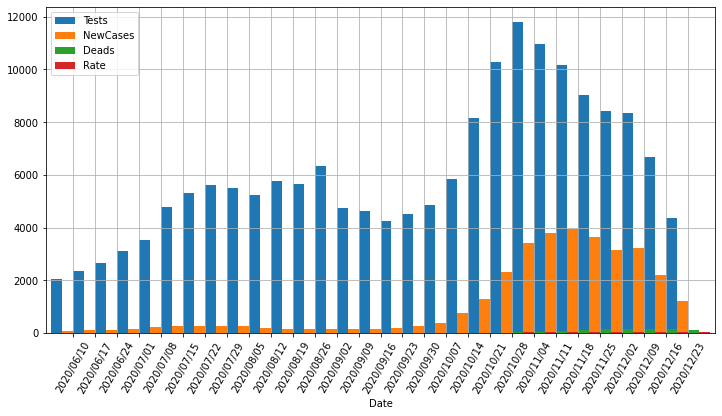

In [13]:
ax = p3.plot.bar(figsize=(12, 6), x='Date',rot=60, width=2, grid=True)
ax.legend(loc=2)

#plt.xticks(p3.index,p3["Date"].values)
ax.set_xticks(ax.get_xticks())

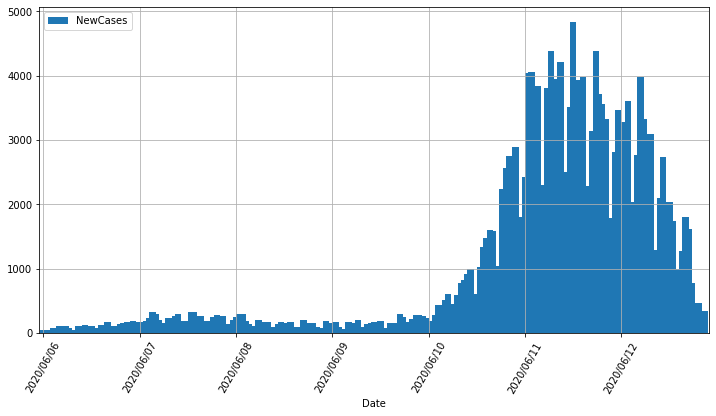

In [14]:
p5 = df2[['Date','NewCases']]
bx = p5.plot.bar(figsize=(12, 6), x='Date', rot=60, width=2, grid=True)
bx.legend(loc=2)
#plt.xticks(p5.index,p5["Date"][0::30].values)
bx.set_xticks(bx.get_xticks()[0::30])

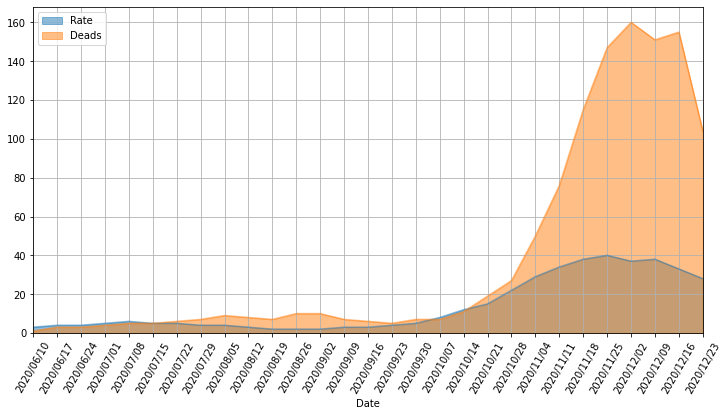

In [28]:
p5 = p3[['Date','Rate','Deads']]
bx = p5.plot.area(figsize=(12, 6), x='Date', rot=60, stacked=False, grid=True)
bx.legend(loc=2)
plt.xticks(p5.index,p5["Date"].values)
bx.set_xticks(bx.get_xticks()) #[0::30])